# SMS SPAM Filter with Natural Language Processing !

# Section I Data Analysis

# Step 1:

### import all modules

In [111]:
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import pandas as pd
import string
import seaborn as sns

### Read the Dataset

In [11]:
df = pd.read_csv("smsspamcollection/SMSSpamCollection", sep="\t", names=["label","message"])
df.head(2)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


This gives us information about columns 

In [12]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


This gives us a general Idea about the Dataset

In [13]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

This shows us how many Spam vd Normal Messages we have in the Dataset we have about 747 apam messages
and 4825 messages which are not spam and 4500 is uniqe messages from there

# Step 2:

### Lets us extract some Features as well 

In [14]:
df["Length"] = df["message"].apply(len)

In [15]:
df.head(2)

,label,message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


### This will help our model to have more features so it can predict based on length of messages

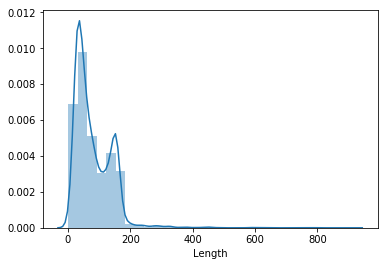

In [19]:
sns.distplot(df["Length"], bins=30)

#### This tell us distribtion of length of messages 

# Questions

### what is Maximum Length of Message some one sent and what is that message

In [24]:
df["Length"].max()

910

In [28]:
df[df["Length"]==910]["message"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

### Conclusion: The Maximum Length of message is 910 and it seems to be a love letter Lol !

### what is Mininum Length of Message some one sent and what is that message

In [32]:
df[df["Length"] == df["Length"].min()]["message"].iloc[0]

'Ok'

### Conclusion: The Mininum Length of message is 2 and it seems to be just OK

In [33]:
df.head(1)

,label,message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111


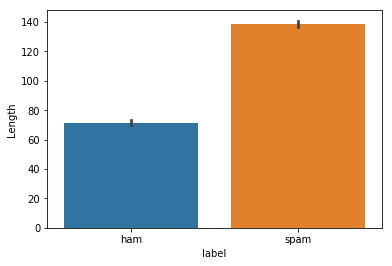

In [36]:
sns.barplot(x='label', y='Length', data=df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a19cc1780>,
      dtype=object)

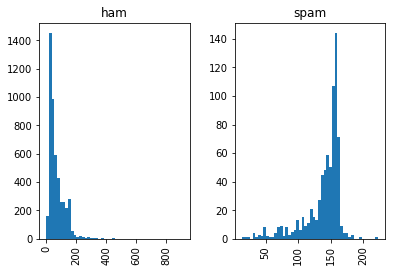

In [37]:
df.hist(column='Length',by='label', bins=50)

# Section II

### Remove Punctuation from message

### Small Library to Pre Process Text Data

# Coded by Soumil Shah

In [86]:
class PreProcessText(object):
    def __init__(self):
        pass
    
    def __remove_punctuation(self, text):
        """
        Takes a String 
        return : Return a String 
        """
        message = []
        for x in text:
            if x in string.punctuation:
                pass
            else:
                message.append(x)
        message = ''.join(message)
        
        return message
    
    def __remove_stopwords(self, text):
        """
        Takes a String
        return List
        """
        words= []
        for x in text.split():

            if x.lower() in stopwords.words('english'):
                pass
            else:
                words.append(x)
        return words
    
    
    def token_words(self,text=''):
        """
        Takes String
        Return Token also called  list of words that is used to 
        Train the Model 
        """
        message = self.__remove_punctuation(text)
        words = self.__remove_stopwords(message)
        return words
        

In [87]:
mess = 'Sample message! Notice: it has punctuation.'
obj = PreProcessText()
words = obj.token_words(mess)
print(words)

['Sample', 'message', 'Notice', 'punctuation']


### we have converted our string into Token for the Model 

In [88]:
df["message"].head(4).apply(obj.token_words)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
Name: message, dtype: object

## Vectorization

In [104]:
bow_transformer = CountVectorizer(analyzer=obj.token_words).fit(df["message"])

In [105]:
messages_bow = bow_transformer.transform(df["message"])

In [106]:
print("Shape of sparese matrix {}".format(messages_bow.shape))

Shape of sparese matrix (5572, 11425)


### Formula to check Sparsity 

In [110]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


#### Converted   word count into TFIDF  think this a weight

In [113]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [114]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

#### Train the Model

In [115]:
from sklearn.naive_bayes import MultinomialNB

In [117]:
model = MultinomialNB().fit(messages_tfidf,df["label"])

#### Prediction

In [123]:
all_predictions = model.predict(messages_tfidf)
pred = pd.DataFrame(data=all_predictions)

pred.head(6)

,0
0,ham
1,ham
2,spam
3,ham
4,ham
5,ham


### True Value

In [124]:
df["label"].head(6)

0     ham
1     ham
2    spam
3     ham
4     ham
5    spam
Name: label, dtype: object